<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-des-librairies" data-toc-modified-id="Import-des-librairies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import des librairies</a></span></li><li><span><a href="#Import-des-données" data-toc-modified-id="Import-des-données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import des données</a></span><ul class="toc-item"><li><span><a href="#Vérification-des-données" data-toc-modified-id="Vérification-des-données-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Vérification des données</a></span></li><li><span><a href="#Nettoyage" data-toc-modified-id="Nettoyage-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Nettoyage</a></span><ul class="toc-item"><li><span><a href="#Date" data-toc-modified-id="Date-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Date</a></span></li><li><span><a href="#Budget" data-toc-modified-id="Budget-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Budget</a></span></li></ul></li><li><span><a href="#Distribution" data-toc-modified-id="Distribution-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Distribution</a></span></li></ul></li><li><span><a href="#Export-des-données" data-toc-modified-id="Export-des-données-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Export des données</a></span><ul class="toc-item"><li><span><a href="#CSV" data-toc-modified-id="CSV-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>CSV</a></span></li><li><span><a href="#JSON" data-toc-modified-id="JSON-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>JSON</a></span></li><li><span><a href="#Conclusion-🎉" data-toc-modified-id="Conclusion-🎉-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Conclusion 🎉</a></span></li></ul></li></ul></div>

🚀 **Fly Me** a lancé un projet ambitieux de développement d'un chatbot pour aider les utilisateurs à choisir une offre de voyage. 

![Fly me](image_notebook/flyme.png)

La première étape de ce projet consiste à construire un MVP qui facilitera la réservation d'un billet d'avion pour les employés de Fly Me qui partent en vacances. 💼✈️🏖️

L'objectif ultime du projet est d'avoir un chatbot capable d'identifier cinq éléments clés dans la demande de l'utilisateur :

- 🏢 Ville de départ
- 🏞️ Ville de destination
- 🗓️ Date souhaitée du vol aller
- 🗓️ Date souhaitée du vol retour
- 💰 Budget maximum pour le prix total des billets

Pour démarrer, prenons ce *notebook* où nous explorerons des données factices fournies par le projet. Vous pouvez les télécharger à cette adresse : [dataset](https://www.microsoft.com/en-us/research/project/frames-dataset/download/). ✨📔

# Import des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import json

from dateutil.parser import parse
from price_parser import Price

from sklearn.model_selection import train_test_split

# Import des données

In [2]:
df = pd.read_json('data/frames.json')
df

,user_id,turns,wizard_id,id,labels
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc..."
1,U21E41CQP,"[{'text': 'Hello, I am looking to book a vacat...",U21DMV0KA,4a3bfa39-2c22-42c8-8694-32b4e34415e9,"{'userSurveyRating': 3.0, 'wizardSurveyTaskSuc..."
2,U21RP4FCY,[{'text': 'Hello there i am looking to go on a...,U21E0179B,6e67ed28-e94c-4fab-96b6-68569a92682f,"{'userSurveyRating': 2.0, 'wizardSurveyTaskSuc..."
3,U22HTHYNP,[{'text': 'Hi I'd like to go to Caprica from B...,U21DKG18C,5ae76e50-5b48-4166-9f6d-67aaabd7bcaa,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."
4,U21E41CQP,"[{'text': 'Hello, I am looking to book a trip ...",U21DMV0KA,24603086-bb53-431e-a0d8-1dcc63518ba9,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."
...,...,...,...,...,...
1364,U2AMZ8TLK,[{'text': 'Hi I've got 9 days free and I'm loo...,U21DMV0KA,957fd205-bb7c-4b81-8cb6-13c81c51c5c9,"{'userSurveyRating': 3.5, 'wizardSurveyTaskSuc..."
1365,U2AMZ8TLK,[{'text': 'I need to get to Fortaleza on Septe...,U260BGVS6,71b21b86-2d05-4372-a0ee-6ed64b0ddc42,"{'userSurveyRating': 4.5, 'wizardSurveyTaskSuc..."
1366,U231PNNA3,[{'text': 'We're finally going on vacation isn...,U21T9NMKM,ef2cd70e-c1f2-42be-8839-cb465af0bf41,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."
1367,U2AMZ8TLK,"[{'text': 'Hi there, I'm looking for a place t...",U21DMV0KA,ffa79d2c-14eb-45e6-8573-b0817a1a1803,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc..."


Voici donc nos données, nous avons 1369 lignes et 5 colonnes. Voyons ce que les différentes colonnes signifient selon la documentation : [ici](https://www.microsoft.com/en-us/research/project/frames-dataset/download/).

- 🆔 **user_id**: Fais référence à un identifiant unique pour l'utilisateur prenant part au dialogue.
- 🔄 **turns**: Un turn dans une conversation est marquée par une interaction de va-et-vient : l'utilisateur parle et le bot suit, ou vice-versa, le turn est une conversation complète entre le chatbot et l'utilisateur. Cette variable possède une liste de dictionnaire, nous allons l'explorer par la suite pour identifier quelle est la signification des différentes clés.
- 🆔 **wizard_id**: Désigne un identifiant unique pour l'assistant prenant part au dialogue.
- 🆔 **id**: Fais référence à une identification unique pour le dialogue.
- 🏷️ **labels**: Score de satisfaction du client et indication si l'assistant pense avoir atteint l'objectif de l'utilisateur.

Voyons maintenant d'un peu plus près les différentes données que nous avons dans la colonne **turns**. Nous prendrons la valeur de la première ligne comme exemple.

In [3]:
df["turns"][0]

[{'text': "I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.",
  'labels': {'acts': [{'args': [{'val': 'book', 'key': 'intent'}],
     'name': 'inform'},
    {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
      {'val': 'Caprica', 'key': 'or_city'},
      {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
      {'val': '8', 'key': 'n_adults'},
      {'val': '1700', 'key': 'budget'}],
     'name': 'inform'}],
   'acts_without_refs': [{'args': [{'val': 'book', 'key': 'intent'}],
     'name': 'inform'},
    {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
      {'val': 'Caprica', 'key': 'or_city'},
      {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
      {'val': '8', 'key': 'n_adults'},
      {'val': '1700', 'key': 'budget'}],
     'name': 'inform'}],
   'active_frame': 1,
   'frames': [{'info': {'intent': [{'val': 'book', 'negated': False}],
      'budget': [{'val': '1700.0', 'negated': False}],

In [4]:
for i in df["turns"][0]:
    print(i.keys())

dict_keys(['text', 'labels', 'author', 'timestamp'])
dict_keys(['db', 'text', 'labels', 'author', 'timestamp'])
dict_keys(['text', 'labels', 'author', 'timestamp'])
dict_keys(['db', 'text', 'labels', 'author', 'timestamp'])
dict_keys(['text', 'labels', 'author', 'timestamp'])
dict_keys(['db', 'text', 'labels', 'author', 'timestamp'])
dict_keys(['text', 'labels', 'author', 'timestamp'])


Nous avons donc nos différentes clés, qui ne sont pas identiques pour chaque turn, chacune indique, selon la documentation, ceci:
- ✍️ **author**: L'auteur du message dans un dialogue. C'est-à-dire "utilisateur" ou "assistant".
- 💬 **text**: La phrase prononcée par l'auteur (chat bot ou utilisateur). C'est le texte exact que l'auteur d'un tour a dit. Par exemple, "texte": "Considérez que c'est fait. Fais bon voyage!".
- 🏷️ **labels**: Objet JSON qui a trois clés : **active_frame**, **actes** et **acts_without_refs**. 
    - Le **active_frame** est l'identifiant du cadre actuellement actif. 
    - Les **acts** sont les actes de dialogue pour l'énoncé courant. Chaque acte a un nom et des arguments.
        - Le **name** est le nom de l'acte de dialogue, par exemple **offer** ou **inform**.
        - Le **args** contient les types d'emplacement **(key)** et les valeurs d'emplacement **(val)**, par exemple budget=$2000.
        - Un **act** contient un **ref tag** chaque fois qu'un utilisateur ou un assistant fait référence à une image passée.
    - Les **acts_without_refs** sont similaires aux actes sauf qu'ils n'ont pas ces balises ref.
    - Nous définissons la tâche de suivi de trame comme la tâche qui prend en entrée les **acts_without_refs** et produit les **acts**.
- ⏰ **timestamp**: Horodatage Unix indiquant l'heure à laquelle le tour actuel s'est produit.
- 🖼️ **frames**: Liste des **frames** jusqu'au **turn** en cours. Chaque frame a les clés suivantes : **frame_id**, **frame_parent_id**, **requests**, **binary_questions**, **compare_requests** et **info**.
- 📚 **db**: Cela ne peut se produire que pendant le **turn** du bot. Il s'agit d'une liste de requêtes de recherche effectuée par l'assistant avec la liste de résultats de recherche associée. Ex. "db": {"search": [{"ORIGIN_CITY": "Montreal"}], "result": []}

Plus de détails sont fournis dans la documentation.

Voyons maintenant les échanges entre l'utilisateur et le bot au cours de ces 7 turns.

In [5]:
for i in range(0, len(df["turns"][0])):

    auteur = df["turns"][0][i]['author']
    message = df["turns"][0][i]['text']

    print("Turn ", i, "|", auteur, ': ', message)
    print("---")

Turn  0 | user :  I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.
---
Turn  1 | wizard :  Hi...I checked a few options for you, and unfortunately, we do not currently have any trips that meet this criteria.  Would you like to book an alternate travel option?
---
Turn  2 | user :  Yes, how about going to Neverland from Caprica on August 13, 2016 for 5 adults. For this trip, my budget would be 1900.
---
Turn  3 | wizard :  I checked the availability for this date and there were no trips available.  Would you like to select some alternate dates?
---
Turn  4 | user :  I have no flexibility for dates... but I can leave from Atlantis rather than Caprica. How about that?
---
Turn  5 | wizard :  I checked the availability for that date and there were no trips available.  Would you like to select some alternate dates?
---
Turn  6 | user :  I suppose I'll speak with my husband to see if we can choose other dates, and then

Voyons maintenant qu'est ce que renseignent les labels et comment le chatbot a identifié les demandes de l'utilisateur pour le premier turn.

In [6]:
print(df["turns"][0][0]['text'])
print("---")
df["turns"][0][0]['labels']

I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.
---


{'acts': [{'args': [{'val': 'book', 'key': 'intent'}], 'name': 'inform'},
  {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
    {'val': 'Caprica', 'key': 'or_city'},
    {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
    {'val': '8', 'key': 'n_adults'},
    {'val': '1700', 'key': 'budget'}],
   'name': 'inform'}],
 'acts_without_refs': [{'args': [{'val': 'book', 'key': 'intent'}],
   'name': 'inform'},
  {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
    {'val': 'Caprica', 'key': 'or_city'},
    {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
    {'val': '8', 'key': 'n_adults'},
    {'val': '1700', 'key': 'budget'}],
   'name': 'inform'}],
 'active_frame': 1,
 'frames': [{'info': {'intent': [{'val': 'book', 'negated': False}],
    'budget': [{'val': '1700.0', 'negated': False}],
    'dst_city': [{'val': 'Atlantis', 'negated': False}],
    'or_city': [{'val': 'Caprica', 'negated': False}],
    'str_date': [{'val': 'august 13', 'negated': False}],
    'n_adults': 

Essayons de rendre cela un peu plus lisible.

In [7]:
key_acts_args = df["turns"][0][0]['labels']['acts'][0]['args'][0]['key']
val_acts_args = df["turns"][0][0]['labels']['acts'][0]['args'][0]['val']
key_acts2_args = df["turns"][0][0]['labels']['acts'][1]['args'][0]['key']
val_acts2_args = df["turns"][0][0]['labels']['acts'][1]['args'][0]['val']
key_acts_val = df["turns"][0][0]['labels']['acts'][1]["args"][1]['key']
val_acts_val = df["turns"][0][0]['labels']['acts'][1]["args"][1]['val']
key_acts_args2 = df["turns"][0][0]['labels']['acts'][1]["args"][2]['key']
val_acts_args2 = df["turns"][0][0]['labels']['acts'][1]["args"][2]['val']
key_acts_args3 = df["turns"][0][0]['labels']['acts'][1]["args"][3]['key']
val_acts_args3 = df["turns"][0][0]['labels']['acts'][1]["args"][3]['val']
key_acts_args4 = df["turns"][0][0]['labels']['acts'][1]["args"][4]['key']
val_acts_args4 = df["turns"][0][0]['labels']['acts'][1]["args"][4]['val']

print(df["turns"][0][0]['text'])
print()
print(key_acts_args, ":", val_acts_args)
print(key_acts2_args, ":", val_acts2_args)
print(key_acts_val, ":", val_acts_val)
print(key_acts_args2, ":", val_acts_args2)
print(key_acts_args3, ":", val_acts_args3)
print(key_acts_args4, ":", val_acts_args4)

I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.

intent : book
dst_city : Atlantis
or_city : Caprica
str_date : Saturday, August 13, 2016
n_adults : 8
budget : 1700


Nous pouvons voir dans ce cas et dans ce premier message, la bonne extraction des informations par le chatbot.

Voyons comment nous pouvons parcourir toute la conversation (côté utilisateur).

In [8]:
liste_variable = [
    'intent', 'or_city', 'dst_city', 'str_date', 'end_date', 'budget'
]
first_turn = df["turns"][0]

# Boucle seulement sur l'utilisateur (de deux en deux à partir de 0)
for i in np.arange(0, len(first_turn), 2):
    print()
    print(first_turn[i]['text'])
    for j in range(0, len(first_turn[i]['labels']['acts'])):
        for k in range(0, len(first_turn[i]['labels']['acts'][j]['args'])):
            key_args = first_turn[i]['labels']['acts'][j]['args'][k]['key']
            value_args = first_turn[i]['labels']['acts'][j]['args'][k]['val']

            # Sans référence (acts)
            if key_args in liste_variable:
                print(key_args, ':', value_args)

            # Avec référence (acts_without_refs)
            elif key_args == 'ref':
                ref_args = first_turn[i]['labels']['acts'][j]['args'][k][
                    'val'][0]['annotations']
                for a in range(0, len(ref_args)):
                    print(ref_args[a]['key'], '| ref:', ref_args[a]['val'])
            else:
                pass


I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.
intent : book
dst_city : Atlantis
or_city : Caprica
str_date : Saturday, August 13, 2016
budget : 1700

Yes, how about going to Neverland from Caprica on August 13, 2016 for 5 adults. For this trip, my budget would be 1900.
dst_city : Neverland
budget : 1900
or_city | ref: Caprica
str_date | ref: August 13, 2016

I have no flexibility for dates... but I can leave from Atlantis rather than Caprica. How about that?
or_city : Atlantis
or_city | ref: Caprica

I suppose I'll speak with my husband to see if we can choose other dates, and then I'll come back to you.Thanks for your help


Nous avons plusieurs chemins:
- Le chemin sans ref
- Le chemin avec ref

Nous rappelons que les informations avec ref sont des informations déjà passées.

## Vérification des données

Nous allons refaire une dataframe plus propre et plus lisible avec les variables dont nous avons besoin.

In [9]:
result = []

for turns in df['turns']:
    new_row = {}

    # Ajoute le premier message de l'utilisateur
    new_row.update({'text': turns[0].get('text')})

    # Filtre sur les labels > acts pour le texte de chaque utilisateur
    for element in turns[0].get('labels').get('acts'):

        # Filtre sur les args dans les labels > acts
        for item in element.get('args'):
            new_row.update({item.get('key'): item.get('val')})

    result.append(new_row)

result_df = pd.DataFrame.from_records(result)

final_df = result_df[[
    'text', 'or_city', 'dst_city', 'str_date', 'end_date', 'budget'
]]

print(final_df.shape)
final_df.head(15)

(1369, 6)


,text,or_city,dst_city,str_date,end_date,budget
0,I'd like to book a trip to Atlantis from Capri...,Caprica,Atlantis,"Saturday, August 13, 2016",NaN,1700
1,"Hello, I am looking to book a vacation from Go...",Gotham City,Mos Eisley,NaN,NaN,2100
2,Hello there i am looking to go on a vacation w...,NaN,Gotham City,NaN,NaN,NaN
3,"Hi I'd like to go to Caprica from Busan, betwe...",Busan,Caprica,"Sunday August 21, 2016","Wednesday August 31, 2016",NaN
4,"Hello, I am looking to book a trip for 2 adult...",Kochi,Denver,NaN,NaN,"$21,300"
5,"Hey, i Want to go to St. Louis on the 17th of ...",NaN,St. Louis,17th of August,NaN,NaN
6,I'm looking for a trip to Gotham City leaving ...,Kakariko Village,Gotham City,"Saturday, August 13, 2016",NaN,$2400 USD
7,"Hello, I would like to book a 2-week trip leav...",Melbourne,Mannheim,August 27,NaN,NaN
8,"Hello, I am planning to book a trip to pittsborgh",NaN,pittsborgh,NaN,NaN,NaN
9,"Hi, I need to go to Mos Eisley for a wedding, ...",NaN,Mos Eisley,"Saturday, August 13, 2016","Tuesday, August 16, 2016",$3700


## Nettoyage

Comme indiqué dans la documentation, nous devons faire attention à la longueur de nos messages. Vérifions si dans notre jeu de données nous avons des textes à plus de 500 caractères.

![characlimit](image_notebook/characlimit.png)

In [10]:
quantite_caractere = final_df['text'].str.len()
print("Le texte le plus long possède", quantite_caractere.max(), "caractères.")

Le texte le plus long possède 385 caractères.


Nous devons maintenant changer les valeurs "-1" qui ne représentent rien, en NaN. Nous allons également vérifier si nous n'avons pas de doublons.

In [11]:
final_df = final_df.replace('-1', np.NaN)

print(final_df.shape)
final_df.head(15)

(1369, 6)


,text,or_city,dst_city,str_date,end_date,budget
0,I'd like to book a trip to Atlantis from Capri...,Caprica,Atlantis,"Saturday, August 13, 2016",NaN,1700
1,"Hello, I am looking to book a vacation from Go...",Gotham City,Mos Eisley,NaN,NaN,2100
2,Hello there i am looking to go on a vacation w...,NaN,Gotham City,NaN,NaN,NaN
3,"Hi I'd like to go to Caprica from Busan, betwe...",Busan,Caprica,"Sunday August 21, 2016","Wednesday August 31, 2016",NaN
4,"Hello, I am looking to book a trip for 2 adult...",Kochi,Denver,NaN,NaN,"$21,300"
5,"Hey, i Want to go to St. Louis on the 17th of ...",NaN,St. Louis,17th of August,NaN,NaN
6,I'm looking for a trip to Gotham City leaving ...,Kakariko Village,Gotham City,"Saturday, August 13, 2016",NaN,$2400 USD
7,"Hello, I would like to book a 2-week trip leav...",Melbourne,Mannheim,August 27,NaN,NaN
8,"Hello, I am planning to book a trip to pittsborgh",NaN,pittsborgh,NaN,NaN,NaN
9,"Hi, I need to go to Mos Eisley for a wedding, ...",NaN,Mos Eisley,"Saturday, August 13, 2016","Tuesday, August 16, 2016",$3700


In [12]:
final_df[final_df.duplicated()].head()

,text,or_city,dst_city,str_date,end_date,budget
191,hey,NaN,NaN,NaN,NaN,NaN
302,hello,NaN,NaN,NaN,NaN,NaN
309,hello,NaN,NaN,NaN,NaN,NaN
312,hello,NaN,NaN,NaN,NaN,NaN
340,hi,NaN,NaN,NaN,NaN,NaN


In [13]:
# Drop duplicate values
final_df = final_df.drop_duplicates()
final_df[final_df.duplicated()].head()

,text,or_city,dst_city,str_date,end_date,budget


### Date

Nous devons avoir un format de date conforme au datetime, nous pourrons avoir des prédictions plus fiables par la suite, que ce soit avec notre modèle et/ou avec un prebuilt.

Nous allons pour cela utiliser dateutil.parser, la fonction **to_datetime** de pandas détecte mal les dates.

In [14]:
final_df[["str_date", "end_date"]].value_counts()

str_date       end_date       
september 6th  9th                2
August 17      September 7        2
24th           27th               2
August 24      August 27          2
August 27th    August 30th        2
                                 ..
August 28      September 11       1
August 29      Sept 1             1
August 29th    September first    1
August 30      September 20       1
yesterday      24th               1
Length: 200, dtype: int64

In [15]:
# Si la date n'est pas detectée alors retourner un NaN (NaT)
def parse_date(date):
    try:
        return parse(date, fuzzy_with_tokens=True)[0]
    except:
        return np.nan

In [17]:
final_df['str_date_formate'] = final_df['str_date'].apply(parse_date)
final_df['end_date_formate'] = final_df['end_date'].apply(parse_date)

In [18]:
final_df[["str_date", "str_date_formate", "end_date",
          "end_date_formate"]].value_counts()

str_date       str_date_formate  end_date       end_date_formate
August 27th    2022-08-27        August 30th    2022-08-30          2
August 24      2022-08-24        August 27      2022-08-27          2
August 17      2022-08-17        September 7    2022-09-07          2
24th           2022-10-24        27th           2022-10-27          2
september 6th  2022-09-06        9th            2022-10-09          2
                                                                   ..
August 27th    2022-08-27        September 1st  2022-09-01          1
                                 September 5th  2022-09-05          1
                                 september 16   2022-09-16          1
August 28      2022-08-28        September 11   2022-09-11          1
wed aug 31     2022-08-31        wed sept 21    2022-09-21          1
Length: 186, dtype: int64

In [19]:
final_df.head(5)

,text,or_city,dst_city,str_date,end_date,budget,str_date_formate,end_date_formate
0,I'd like to book a trip to Atlantis from Capri...,Caprica,Atlantis,"Saturday, August 13, 2016",NaN,1700,2016-08-13,NaT
1,"Hello, I am looking to book a vacation from Go...",Gotham City,Mos Eisley,NaN,NaN,2100,NaT,NaT
2,Hello there i am looking to go on a vacation w...,NaN,Gotham City,NaN,NaN,NaN,NaT,NaT
3,"Hi I'd like to go to Caprica from Busan, betwe...",Busan,Caprica,"Sunday August 21, 2016","Wednesday August 31, 2016",NaN,2016-08-21,2016-08-31
4,"Hello, I am looking to book a trip for 2 adult...",Kochi,Denver,NaN,NaN,"$21,300",NaT,NaT


Les dates sans années de détectées auront pour année 2022.

### Budget

Faisons la même chose avec le budget. Nous allons utiliser la bibliothèque **price_parser**.

In [20]:
final_df["budget"].value_counts()

3200                                        9
1800                                        6
2900                                        5
2000                                        5
4300                                        5
                                           ..
$2100                                       1
$2600                                       1
10300                                       1
4 thousand dollars plus more 300 dollars    1
15600                                       1
Name: budget, Length: 117, dtype: int64

In [21]:
# Exemple | Nous avons par moment des budgets séparés par des virgules comme
# 12,000 pour 12000, decimal_separator sera donc utilisé
price = Price.fromstring("22,90", decimal_separator=".")
price

Price(amount=Decimal('2290'), currency=None)

In [22]:
def parse_price(price):
    try:
        price = Price.fromstring(price, decimal_separator=".")
        return price.amount_float
    except:
        return np.nan

In [23]:
final_df['budget_formate'] = final_df['budget'].apply(parse_price)

In [24]:
final_df[["budget_formate", "budget"]].value_counts()

budget_formate  budget      
3200.0          3200            9
1800.0          1800            6
2000.0          2000            5
2900.0          2900            5
4300.0          4300            5
                               ..
1000.0          under 1000      1
5000.0          5000 dollars    1
3000.0          3000            1
1000.0          1000            1
35400.0         35400           1
Length: 110, dtype: int64

## Distribution

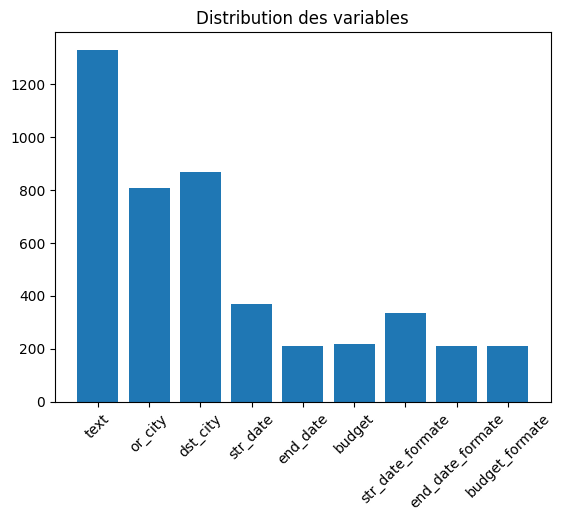

In [25]:
# Plot the classes distribution
plt.figure()
plt.bar(x=final_df.columns,
        height=final_df.count(),
        tick_label=list(final_df.columns))
plt.xticks(rotation=45)
plt.title('Distribution des variables')
plt.show()

Nous avons beaucoup de valeurs manquantes qui pourraient faire référence à des objectifs non atteints (l'utilisateur n'a pas réservé de vol).

Nous allons donc séparer la dataframe en deux, de manière à avoir une dataframe avec au moins l'intention d'acheter un vol (au moins une des variables contient une valeur en dehors de la variable text) et une autre avec des valeurs NaN sur toutes les variables excepté la variable texte.

In [26]:
df_intention_vol = final_df[~(
    final_df.or_city.isna() & final_df.dst_city.isna()
    & final_df.str_date.isna() & final_df.end_date.isna()
    & final_df.budget.isna())]

print(df_intention_vol.shape)
df_intention_vol.head()

(1124, 9)


,text,or_city,dst_city,str_date,end_date,budget,str_date_formate,end_date_formate,budget_formate
0,I'd like to book a trip to Atlantis from Capri...,Caprica,Atlantis,"Saturday, August 13, 2016",NaN,1700,2016-08-13,NaT,1700.0
1,"Hello, I am looking to book a vacation from Go...",Gotham City,Mos Eisley,NaN,NaN,2100,NaT,NaT,2100.0
2,Hello there i am looking to go on a vacation w...,NaN,Gotham City,NaN,NaN,NaN,NaT,NaT,NaN
3,"Hi I'd like to go to Caprica from Busan, betwe...",Busan,Caprica,"Sunday August 21, 2016","Wednesday August 31, 2016",NaN,2016-08-21,2016-08-31,NaN
4,"Hello, I am looking to book a trip for 2 adult...",Kochi,Denver,NaN,NaN,"$21,300",NaT,NaT,21300.0


In [27]:
df_autre_intention = final_df[(final_df.or_city.isna()
                               & final_df.dst_city.isna()
                               & final_df.str_date.isna()
                               & final_df.end_date.isna()
                               & final_df.budget.isna())]

print(df_autre_intention.shape)
df_autre_intention

(205, 9)


,text,or_city,dst_city,str_date,end_date,budget,str_date_formate,end_date_formate,budget_formate
40,Hi!,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
48,Heyo!,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
51,Hi going on vacation with my Family can you he...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
52,Good morning.,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
55,Hi. I am in dire need of a vacation.,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
...,...,...,...,...,...,...,...,...,...
1350,"Hey, my buddy and I want to have the best time...",NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
1355,Oh my god there are so many places I want to g...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
1359,My name is Stephen King and I want to book a ...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
1361,"hey, we're having a huge family trip. Think yo...",NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN


# Export des données

## CSV

Nous avons donc au total 1124 lignes. Nous allons diviser notre dataframe en trois avec une dataframe pour l'entrainement, une pour les test et une pour la validation.

La dataframe de validation nous servira pour tester notre modèle en production.

In [28]:
# Récupère 24 lignes à la dataframe initiale
df_intention_vol_reste, val_df = train_test_split(df_intention_vol,
                                                  test_size=24,
                                                  random_state=42)

# Récupère 200 lignes à la dataframe
# Le reste des lignes seront pour l'entrainement
train_df, test_df = train_test_split(df_intention_vol_reste,
                                     test_size=200,
                                     random_state=42)

# Check of distribution
print('Train: ', train_df.shape)
print('-------')
print('Test', test_df.shape)
print('-------')
print('Prod', val_df.shape)

Train:  (900, 9)
-------
Test (200, 9)
-------
Prod (24, 9)


Sauvegardons maintenant nos dataframe en CSV.

In [29]:
train_df.to_csv('data/train_df.csv', index=None)
test_df.to_csv('data/test_df.csv', index=None)
val_df.to_csv('data/prod_df.csv', index=None)

## JSON

Nous allons formater nos valeurs pour n'avoir que les valeurs numériques et alphabétiques.

In [30]:
# parse_date permet d'importer le csv avec le type de colonne date sur les colonnes indiquées
df_train = pd.read_csv('data/train_df.csv',
                       parse_dates=['str_date_formate', 'end_date_formate'])
df_test = pd.read_csv('data/test_df.csv',
                      parse_dates=['str_date_formate', 'end_date_formate'])
df_val = pd.read_csv('data/prod_df.csv',
                     parse_dates=['str_date_formate', 'end_date_formate'])

In [31]:
df_train = df_train.replace({'[^A-Za-z0-9]+': ' '}, regex=True)
df_test = df_test.replace({'[^A-Za-z0-9]+': ' '}, regex=True)
df_val = df_val.replace({'[^A-Za-z0-9]+': ' '}, regex=True)

In [32]:
# Pour ne pas utiliser la colonne texte dans la construction du json
df_train_withouttxt = df_train[[
    "or_city", "dst_city", "str_date", "end_date", "budget",
    "str_date_formate", "end_date_formate"
]]
df_test_withouttxt = df_test[[
    "or_city", "dst_city", "str_date", "end_date", "budget",
    "str_date_formate", "end_date_formate"
]]
df_val_withouttxt = df_val[[
    "or_city", "dst_city", "str_date", "end_date", "budget",
    "str_date_formate", "end_date_formate"
]]

liste_df_withouttxt = [
    df_train_withouttxt, df_test_withouttxt, df_val_withouttxt
]

In [33]:
liste_colonnes = ["or_city", "dst_city", "str_date", "end_date", "budget"]
liste_colonnes

['or_city', 'dst_city', 'str_date', 'end_date', 'budget']

In [34]:
df_train_withouttxt

,or_city,dst_city,str_date,end_date,budget,str_date_formate,end_date_formate
0,NaN,St Petersburg,NaN,NaN,NaN,NaT,NaT
1,TIJUANA,CURITIBA,AUG 27,SEPT 4,NaN,2022-08-27,2022-09-04
2,punta cana,NaN,NaN,NaN,NaN,NaT,NaT
3,Mexico City,Milan,NaN,NaN,2400,NaT,NaT
4,NaN,Kyoto,NaN,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...
895,NaN,NaN,August 27th,August 30th,NaN,2022-08-27,2022-08-30
896,Belem,Rome,NaN,NaN,NaN,NaT,NaT
897,sydney,coruscant,NaN,NaN,NaN,NaT,NaT
898,Salvador,Houston,NaN,NaN,3400,NaT,NaT


In [35]:
def ifnotnan(colonne, index, texte, df_wtxt):
    element = df_wtxt.loc[index][colonne]
    element = element.lower()
    print(element)
    print(texte)
    print(colonne)
    position_char = (re.search(element, texte))
    return position_char.start(), position_char.end()


def dicte_char_entity(startchar, endchar, entityName):
    dicte_or_city = {
        "startCharIndex": startchar,
        "endCharIndex": endchar,
        "entityName": entityName
    }

    return dicte_or_city


def construction(df_type, df_wtxt):
    liste_all_dictes = []
    for i in range(len(df_wtxt)):
        texte = df_type.loc[i]["text"]
        texte = texte.lower()
        liste_dicte = []
        for colonne in liste_colonnes:
            if df_wtxt.loc[i][colonne] not in ['nan', np.nan, np.NaN]:
                start_char, end_char = ifnotnan(colonne, i, texte, df_wtxt)
                dicte_all = dicte_char_entity(start_char, end_char, colonne)
                liste_dicte.append(dicte_all)

        labeledExampleUtteranceWithMLEntity = {
            "text":
            texte,
            "intentName":
            "Booking",
            "entityLabels": [{
                "startCharIndex":
                0,
                "endCharIndex":
                len(texte),
                "entityName":
                "FlyOrder",
                "children": [{
                    "startCharIndex": 0,
                    "endCharIndex": len(texte),
                    "entityName": "Fly",
                    "children": liste_dicte
                }]
            }]
        }

        liste_all_dictes.append(labeledExampleUtteranceWithMLEntity)

    return liste_all_dictes

In [36]:
df_train_json = construction(df_train, df_train_withouttxt)
df_test_json = construction(df_test, df_test_withouttxt)
df_val_json = construction(df_val, df_val_withouttxt)

print(df_train_json[:1])
print()
print(df_test_json[:1])
print()
print(df_val_json[:1])
print()

st petersburg
i am a world renowned pastry chef and i need to travel to st petersburg stat 
dst_city
tijuana
im in tijuana find me a flight to curitiba aug 27 to sept 4
or_city
curitiba
im in tijuana find me a flight to curitiba aug 27 to sept 4
dst_city
aug 27
im in tijuana find me a flight to curitiba aug 27 to sept 4
str_date
sept 4
im in tijuana find me a flight to curitiba aug 27 to sept 4
end_date
punta cana
hi im from punta cana looking to go on a trip
or_city
mexico city
where can this guy go for 2400 i live in mexico city been dreaming of a trip to milan
or_city
milan
where can this guy go for 2400 i live in mexico city been dreaming of a trip to milan
dst_city
2400
where can this guy go for 2400 i live in mexico city been dreaming of a trip to milan
budget
kyoto
are there 5 star hotels in kyoto 
dst_city
tofino
hello there i am looking for a travel package departing from tofino on or after august 29 i would like to go to calgary with a party of fourteen adults 
or_city
calgar

paris
please get me out to paris 
dst_city
4000
hi i only have 4000 dollars
budget
jerusalem
can you get me and my family a vacation that departs from jerusalem 
or_city
stuttgart
let me tell you about the succulent oysters i had last time i was in kingston i m trying to get back there though and to leave from stuttgart for 4300 dollars
or_city
kingston
let me tell you about the succulent oysters i had last time i was in kingston i m trying to get back there though and to leave from stuttgart for 4300 dollars
dst_city
4300
let me tell you about the succulent oysters i had last time i was in kingston i m trying to get back there though and to leave from stuttgart for 4300 dollars
budget
sao paulo
i would like to find a vacation between september 20th and october 4th from sao paulo to leon
or_city
leon
i would like to find a vacation between september 20th and october 4th from sao paulo to leon
dst_city
september 20th
i would like to find a vacation between september 20th and october 4th

8900 dollars
hey there slightly smiling face i m bringing my wife 2 adults and 4 kids 6 people in total on vacation for 8900 dollars
budget
mexico city
hi i m looking for a trip from thursday august 18 2016 to thursday september 8 2016 to mexico city
dst_city
thursday august 18 2016
hi i m looking for a trip from thursday august 18 2016 to thursday september 8 2016 to mexico city
str_date
thursday september 8 2016
hi i m looking for a trip from thursday august 18 2016 to thursday september 8 2016 to mexico city
end_date
tel aviv
i d like to book a trip for myself from tel aviv to tampa from departing aug 21 returning aug 24 do you have such a flight for me 
or_city
tampa
i d like to book a trip for myself from tel aviv to tampa from departing aug 21 returning aug 24 do you have such a flight for me 
dst_city
aug 21
i d like to book a trip for myself from tel aviv to tampa from departing aug 21 returning aug 24 do you have such a flight for me 
str_date
aug 24
i d like to book a trip fo

2000
i wanna leave tel aviv go 2 vitoria with 11 adults and we will spend 2000 at most
budget
stuttgart
hi i m a very interesting person from stuttgart and i need to get myself to sapporo i am traveling with a friend 
or_city
sapporo
hi i m a very interesting person from stuttgart and i need to get myself to sapporo i am traveling with a friend 
dst_city
mannheim
hi im in mannheim and want to spend a week away
or_city
hiroshima
hi i wanna take a 12 day trip from hiroshima to phoenix leaving on august 27th 
or_city
phoenix
hi i wanna take a 12 day trip from hiroshima to phoenix leaving on august 27th 
dst_city
august 27th
hi i wanna take a 12 day trip from hiroshima to phoenix leaving on august 27th 
str_date
portland
i have 11 days of time off starting on august 17 can you offer me any vacation packages leaving from portland 
or_city
august 17
i have 11 days of time off starting on august 17 can you offer me any vacation packages leaving from portland 
str_date
toronto
hi there looking

27th of august
i want to book a vacation between the 27th of august and the 16th of september for under 1400
str_date
16th of september
i want to book a vacation between the 27th of august and the 16th of september for under 1400
end_date
1400
i want to book a vacation between the 27th of august and the 16th of september for under 1400
budget
nagoya
good morning i need to book a trip for 7 of my colleagues there are a couple possible destinations the first one is to cancun the departure could be from nagoya and the trip would ideally be between august 24th and september 11th
or_city
cancun
good morning i need to book a trip for 7 of my colleagues there are a couple possible destinations the first one is to cancun the departure could be from nagoya and the trip would ideally be between august 24th and september 11th
dst_city
august 24th
good morning i need to book a trip for 7 of my colleagues there are a couple possible destinations the first one is to cancun the departure could be fro

cancun
hi i want to go on vacation i leave from cancun
or_city
september 24th
hello i am travelling with a pretty big group soon september 24th we ll leave
str_date
san fran
hi is there anything from san fran to pittsburgh on or after september 1 
or_city
pittsburgh
hi is there anything from san fran to pittsburgh on or after september 1 
dst_city
on or after september 1
hi is there anything from san fran to pittsburgh on or after september 1 
str_date
vancouver
i should hope so vancouver to berlin 5 star hotel business class the works
or_city
berlin
i should hope so vancouver to berlin 5 star hotel business class the works
dst_city
mannheim
hi i was hoping you can help me find a vacation for under 1000 i live in mannheim 
or_city
under 1000
hi i was hoping you can help me find a vacation for under 1000 i live in mannheim 
budget
mannheim
hey i need to get to mannheim asap
dst_city
theed
theed
dst_city
washington
hey i d love to bring my 4 kids to go see their mom who s currently worki

In [37]:
print("dj_json len:", len(df_train_json))
print("dj_test_json len:", len(df_test_json))
print("dj_val_json len:", len(df_val_json))

dj_json len: 900
dj_test_json len: 200
dj_val_json len: 24


In [38]:
with open("data/train.json", "w") as outfile:
    json.dump(df_train_json, outfile)

with open("data/test.json", "w") as outfile:
    json.dump(df_test_json, outfile)

with open("data/val.json", "w") as outfile:
    json.dump(df_val_json, outfile)

## Conclusion 🎉

Nous avons nettoyé chaque tweet, en supprimant la ponctuation, en lemmatisant et en racinisant les mots pour faciliter l'analyse du sentiment.

Finalement, nous avons préparé les données pour le modèle d'apprentissage automatique. Les données ont été réparties en trois ensembles : l'ensemble d'entraînement, l'ensemble de test et l'ensemble de validation. Voici le nombre d'échantillons dans chaque ensemble :

- Ensemble d'entraînement : 900 échantillons
- Ensemble de test : 200 échantillons
- Ensemble de validation : 24 échantillons

Ce travail préliminaire est essentiel pour préparer nos données pour l'étape suivante : l'entraînement de modèles de machine learning pour effectuer une analyse de sentiments plus précise et plus robuste sur nos tweets ! 🚀